<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


<h1>Basic Info </h1>


In [5]:
boston_df.describe(include="all")

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<h1>Descriptive Statistics and Visualizations </h1>

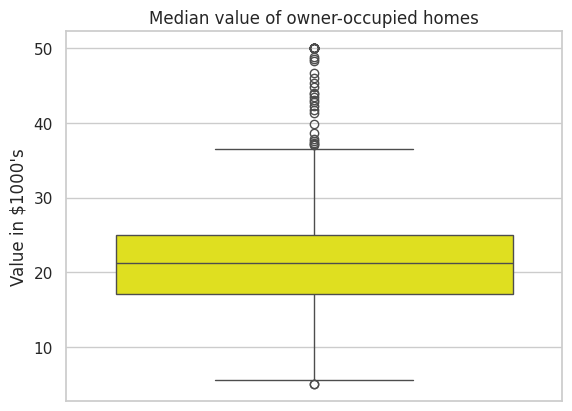

The median value of an owner-occupied home in Boston is: 21.2 thousand dollars
The 25th percentile is: 17.025 thousand dollars
The 75th percentile is: 25.0 thousand dollars
The most expensive owner-occupied home is worth: 50.0 thousand dollars
The least expensive owner-occupied home is worth: 5.0 thousand dollars


In [58]:
sns.boxplot(y='MEDV',data=boston_df, color="yellow")
pyplot.title("Median value of owner-occupied homes")
pyplot.ylabel("Value in $1000's")
pyplot.show()

Q1 = boston_df["MEDV"].quantile(0.25)
Q3 = boston_df["MEDV"].quantile(0.75)
Max = boston_df["MEDV"].max()
Min = boston_df["MEDV"].min()

print("The median value of an owner-occupied home in Boston is:", boston_df["MEDV"].median(), "thousand dollars")
print("The 25th percentile is:", Q1, "thousand dollars") 
print("The 75th percentile is:", Q3, "thousand dollars") 
print("The most expensive owner-occupied home is worth:",Max,"thousand dollars")
print("The least expensive owner-occupied home is worth:",Min,"thousand dollars")

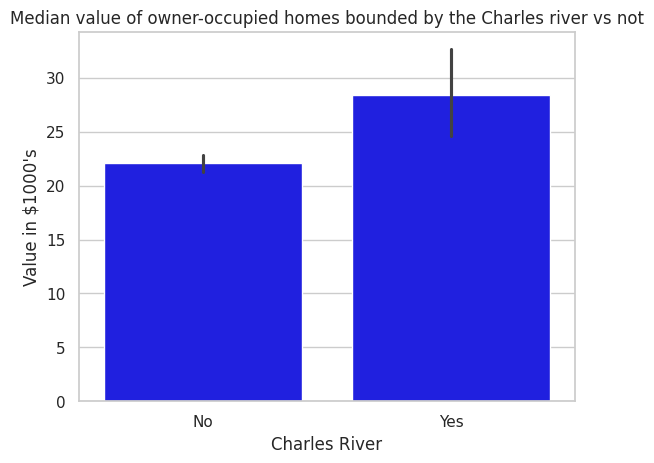

In [56]:
sns.barplot(x="CHAS", y="MEDV",data=boston_df, color="blue")
pyplot.title("Median value of owner-occupied homes bounded by the Charles river vs not")
pyplot.ylabel("Value in $1000's")
pyplot.xlabel("Charles River")
bar_labels = ["No", "Yes"]
pyplot.xticks(ticks=[0, 1], labels=bar_labels)
pyplot.show()

The houses that are bounded by the Charles river have a higher median value than those who are not

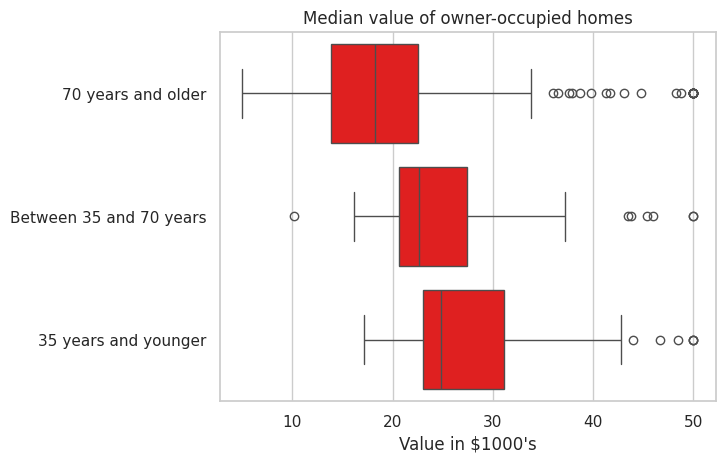

In [59]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
age_group_order = ['70 years and older', 'Between 35 and 70 years','35 years and younger']

sns.boxplot(x='MEDV', y="age_group", data=boston_df, order=age_group_order, color="red")
pyplot.title("Median value of owner-occupied homes")
pyplot.xlabel("Value in $1000's")
pyplot.ylabel("")
pyplot.show()

We can see that the median value of owner-occupied homes is higher for younger people than it 